## Loading and EDA

In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression

In [2]:
data = pd.read_csv("data/Base.csv")
data

,fraud_bool,income,name_email_similarity,prev_address_months_count,current_address_months_count,customer_age,days_since_request,intended_balcon_amount,payment_type,zip_count_4w,...,has_other_cards,proposed_credit_limit,foreign_request,source,session_length_in_minutes,device_os,keep_alive_session,device_distinct_emails_8w,device_fraud_count,month
0,0,0.3,0.986506,-1,25,40,0.006735,102.453711,AA,1059,...,0,1500.0,0,INTERNET,16.224843,linux,1,1,0,0
1,0,0.8,0.617426,-1,89,20,0.010095,-0.849551,AD,1658,...,0,1500.0,0,INTERNET,3.363854,other,1,1,0,0
2,0,0.8,0.996707,9,14,40,0.012316,-1.490386,AB,1095,...,0,200.0,0,INTERNET,22.730559,windows,0,1,0,0
3,0,0.6,0.475100,11,14,30,0.006991,-1.863101,AB,3483,...,0,200.0,0,INTERNET,15.215816,linux,1,1,0,0
4,0,0.9,0.842307,-1,29,40,5.742626,47.152498,AA,2339,...,0,200.0,0,INTERNET,3.743048,other,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,0,0.8,0.124690,-1,143,30,0.051348,-0.826239,AB,530,...,0,1500.0,0,INTERNET,16.967770,other,0,1,0,7
999996,0,0.9,0.824544,-1,193,30,0.009591,0.008307,AC,408,...,1,1000.0,0,INTERNET,1.504109,macintosh,0,1,0,7
999997,0,0.8,0.140891,-1,202,10,0.059287,50.609995,AA,749,...,0,200.0,0,INTERNET,16.068595,other,0,1,0,7
999998,0,0.9,0.002480,52,3,30,0.023357,-1.313387,AB,707,...,0,200.0,0,INTERNET,1.378683,linux,1,1,0,7


In [3]:
data['fraud_bool'] = data.pop('fraud_bool')
data

,income,name_email_similarity,prev_address_months_count,current_address_months_count,customer_age,days_since_request,intended_balcon_amount,payment_type,zip_count_4w,velocity_6h,...,proposed_credit_limit,foreign_request,source,session_length_in_minutes,device_os,keep_alive_session,device_distinct_emails_8w,device_fraud_count,month,fraud_bool
0,0.3,0.986506,-1,25,40,0.006735,102.453711,AA,1059,13096.035018,...,1500.0,0,INTERNET,16.224843,linux,1,1,0,0,0
1,0.8,0.617426,-1,89,20,0.010095,-0.849551,AD,1658,9223.283431,...,1500.0,0,INTERNET,3.363854,other,1,1,0,0,0
2,0.8,0.996707,9,14,40,0.012316,-1.490386,AB,1095,4471.472149,...,200.0,0,INTERNET,22.730559,windows,0,1,0,0,0
3,0.6,0.475100,11,14,30,0.006991,-1.863101,AB,3483,14431.993621,...,200.0,0,INTERNET,15.215816,linux,1,1,0,0,0
4,0.9,0.842307,-1,29,40,5.742626,47.152498,AA,2339,7601.511579,...,200.0,0,INTERNET,3.743048,other,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,0.8,0.124690,-1,143,30,0.051348,-0.826239,AB,530,6732.602414,...,1500.0,0,INTERNET,16.967770,other,0,1,0,7,0
999996,0.9,0.824544,-1,193,30,0.009591,0.008307,AC,408,1574.293294,...,1000.0,0,INTERNET,1.504109,macintosh,0,1,0,7,0
999997,0.8,0.140891,-1,202,10,0.059287,50.609995,AA,749,1258.864938,...,200.0,0,INTERNET,16.068595,other,0,1,0,7,0
999998,0.9,0.002480,52,3,30,0.023357,-1.313387,AB,707,7048.137128,...,200.0,0,INTERNET,1.378683,linux,1,1,0,7,0


In [4]:
data.isnull().sum()

income                              0
name_email_similarity               0
prev_address_months_count           0
current_address_months_count        0
customer_age                        0
days_since_request                  0
intended_balcon_amount              0
payment_type                        0
zip_count_4w                        0
velocity_6h                         0
velocity_24h                        0
velocity_4w                         0
bank_branch_count_8w                0
date_of_birth_distinct_emails_4w    0
employment_status                   0
credit_risk_score                   0
email_is_free                       0
housing_status                      0
phone_home_valid                    0
phone_mobile_valid                  0
bank_months_count                   0
has_other_cards                     0
proposed_credit_limit               0
foreign_request                     0
source                              0
session_length_in_minutes           0
device_os   

In [5]:
for col in data.columns:
    print('{} : {}'.format(col,data[col].unique()))

income : [0.3 0.8 0.6 0.9 0.2 0.1 0.5 0.7 0.4]
name_email_similarity : [0.98650631 0.61742601 0.99670702 ... 0.14089138 0.00248024 0.99339133]
prev_address_months_count : [ -1   9  11  22  21  13  26  33  27  23   8  96  24  48  49  51 235 287
 152  90  20  31  10 203 106  52  53 189 140  99  46  55  30  36  29  87
  18 183 325  28 316  34  50  12  85  57  32 239 151 232 153  40 100  83
 154  25 288 182  38 103  98  92 174 144  62  56  78  43  82 166  73  95
  17 175  14 111  35 308  69 311  15  45  37  77  44  91  60 192  63 102
  97  74  89 293  88 123 209  47 238  41  58  19 190 127  84  54 181  86
 216 198  79 207 220 120 101 162 342 202 215 121 187 231 208 186 196  81
 242 122  42  94   7 304 116 107  70 273 197 265 226 195 188 143 185 164
  59 221 194  93  66 309 191 206 180 131 320 282 159 133 255  68 213  80
 201 218 268 296 104 298  39  61 214  67 105 155 237  16 125 200 135 228
 117 119 108 139 233 227 199 177 145 295  72 112 141 336   6 219 170 253
 129 317  71 179 324 323 1

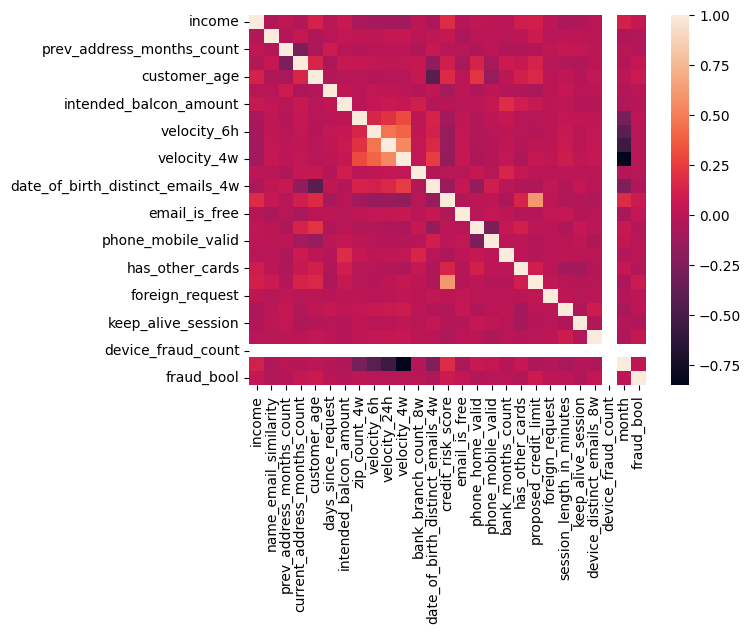

In [6]:
sns.heatmap(data.corr())
plt.show()

Similar to the proposed hypothesis, there seems to be some observed correlation between variables:
1. the velocity (6h, 24h and 4w)
2. the proposed_credit_limit and credit_risk_score.

## Feature Engineering

In [42]:
# first split train-test-validation:
data['month'].value_counts()
test = data.loc[data['month'].isin([6,7])]
X_test = test.iloc[:,:-1]
y_test = test.iloc[:,-1:]

train = data.loc[~data['month'].isin([6,7])]
X_train = train.iloc[:,:-1]
y_train = train.iloc[:,-1:]

X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.15, random_state=42)
ros = RandomOverSampler(random_state=42)

X_train, y_train = ros.fit_resample(X_train, y_train)

print(X_test.shape, y_test.shape, X_train.shape, y_train.shape, X_valid.shape, y_valid.shape)
print(y_train.value_counts())

(205011, 31) (205011, 1) (1337530, 31) (1337530, 1) (119249, 31) (119249, 1)
fraud_bool
0             668765
1             668765
dtype: int64


From the information given from the datasheet, the data can be separated by time by using the `month` column [0,7] which represents the 8 months at which the data is collected across. As data which are more recent will be closer to the actual data, hence `month` 6 and 7 will be taken out as the test data. For the remaining 6 months, it will be split randomly in a 85/15 split into train and validation for testing.

In [43]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, roc_curve, auc

# Function to evaluate the model and print metrics
def evaluate_model(model, X_train, y_train, X_valid, y_valid):
    # Train the model
    y_train = y_train.values.ravel()
    y_valid = y_valid.values.ravel()
    model.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = model.predict(X_valid)

    # Print accuracy
    print('Accuracy on validation set: {:.8f}'.format(accuracy_score(y_valid, y_pred)))

    # Print confusion matrix
    tn, fp, fn, tp = confusion_matrix(y_valid, y_pred).ravel()
    print('True Neg:', tn, '\t' ,'False Pos:', fp)
    print('False Neg:', fn, '\t', 'True Pos:', tp)

    # Print precision and recall
    print('Precision on validation set: {:.8f}'.format(precision_score(y_valid, y_pred)))
    print('Recall on validation set: {:.8f}'.format(recall_score(y_valid, y_pred)))
    print('F1-Score on validation set: {:.8f}'.format(f1_score(y_valid, y_pred)))


    # Plot ROC Curve
    try:
        class_prob = model.predict_proba(X_valid)
        preds = class_prob[:, 1]
        fpr, tpr, threshold = roc_curve(y_valid, preds)
        roc_auc = auc(fpr, tpr)
        plt.figure()
        plt.plot(fpr, tpr, label='Model (area = %0.5f)' % roc_auc)
        plt.plot([0, 1], [0, 1], 'r--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('Receiver Operating Characteristic')
        plt.legend(loc="lower right")
        plt.show()
    except AttributeError:
        print("Model does not have predict_proba method. ROC curve not plotted.")

### Velocity

#### PCA

[0.82435948 0.13514219]


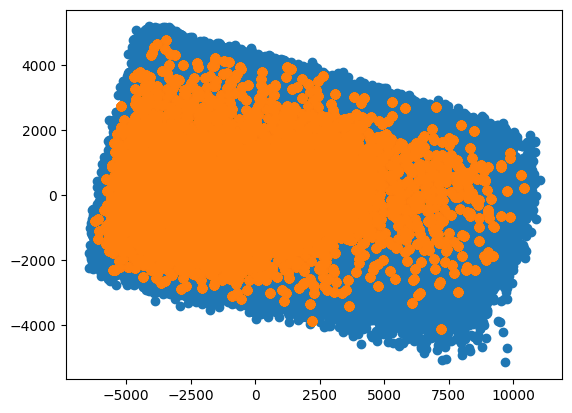

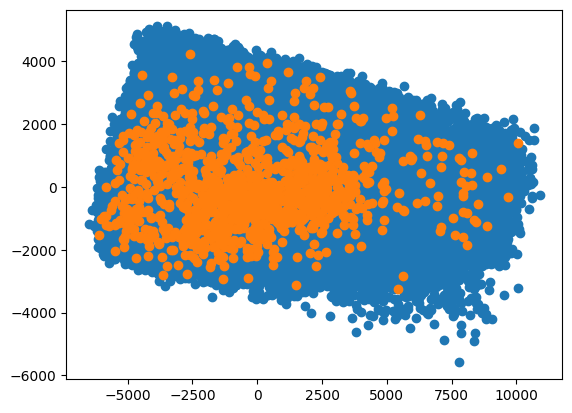

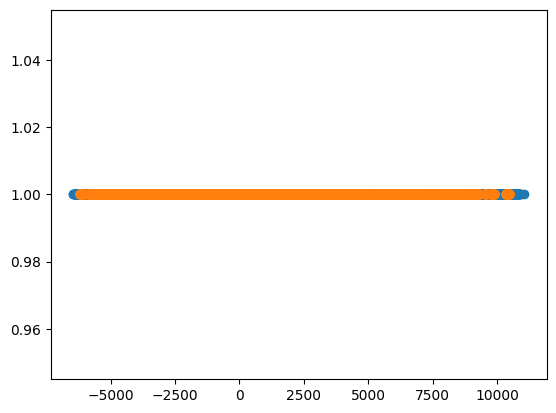

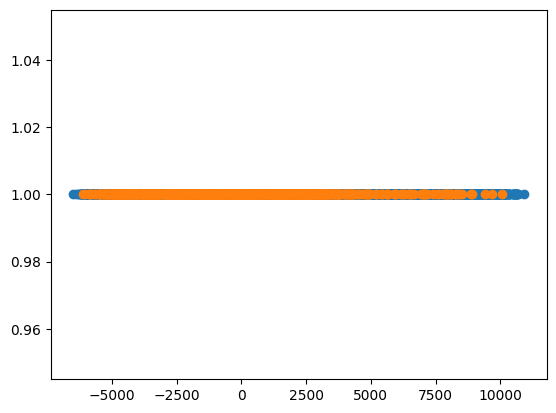

In [86]:
pca = PCA(n_components=2)
components = pca.fit_transform(X_train[['velocity_6h', 'velocity_24h', 'velocity_4w']])
print(pca.explained_variance_ratio_)

plt.scatter(components[list(y_train['fraud_bool'] == 0),0], components[list(y_train['fraud_bool'] == 0),1])
plt.scatter(components[list(y_train['fraud_bool'] == 1),0], components[list(y_train['fraud_bool'] == 1),1])
plt.show()

valid_comp = pca.transform(X_valid[['velocity_6h', 'velocity_24h', 'velocity_4w']])
plt.scatter(valid_comp[list(y_valid['fraud_bool'] == 0),0], valid_comp[list(y_valid['fraud_bool'] == 0),1])
plt.scatter(valid_comp[list(y_valid['fraud_bool'] == 1),0], valid_comp[list(y_valid['fraud_bool'] == 1),1])
plt.show()

plt.scatter(components[list(y_train['fraud_bool'] == 0),0], np.ones(len(components[list(y_train['fraud_bool'] == 0),0])))
plt.scatter(components[list(y_train['fraud_bool'] == 1),0], np.ones(len(components[list(y_train['fraud_bool'] == 0),0])))
plt.show()

plt.scatter(valid_comp[list(y_valid['fraud_bool'] == 0),0], np.ones(len(valid_comp[list(y_valid['fraud_bool'] == 0),0])))
plt.scatter(valid_comp[list(y_valid['fraud_bool'] == 1),0], np.ones(len(valid_comp[list(y_valid['fraud_bool'] == 1),0])))
plt.show()

Accuracy on validation set: 0.51453681
True Neg: 60725 	 False Pos: 57348
False Neg: 543 	 True Pos: 633
Precision on validation set: 0.01091737
Recall on validation set: 0.53826531
F1-Score on validation set: 0.02140068


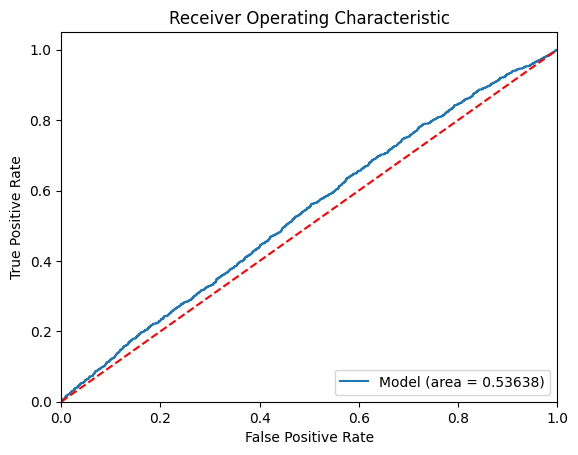

In [87]:
# base model
logs = LogisticRegression()
evaluate_model(logs, X_train[['velocity_6h', 'velocity_24h', 'velocity_4w']], y_train, X_valid[['velocity_6h', 'velocity_24h', 'velocity_4w']], y_valid)

Accuracy on validation set: 0.49636475
True Neg: 58536 	 False Pos: 59537
False Neg: 521 	 True Pos: 655
Precision on validation set: 0.01088184
Recall on validation set: 0.55697279
F1-Score on validation set: 0.02134663


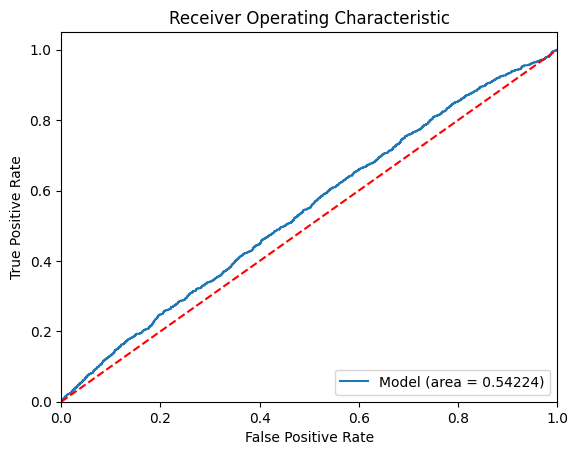

In [88]:
# with PCA-transformed
logs = LogisticRegression()
evaluate_model(logs, components, y_train, valid_comp, y_valid)

Accuracy on validation set: 0.49467920
True Neg: 58331 	 False Pos: 59742
False Neg: 517 	 True Pos: 659
Precision on validation set: 0.01091042
Recall on validation set: 0.56037415
F1-Score on validation set: 0.02140410


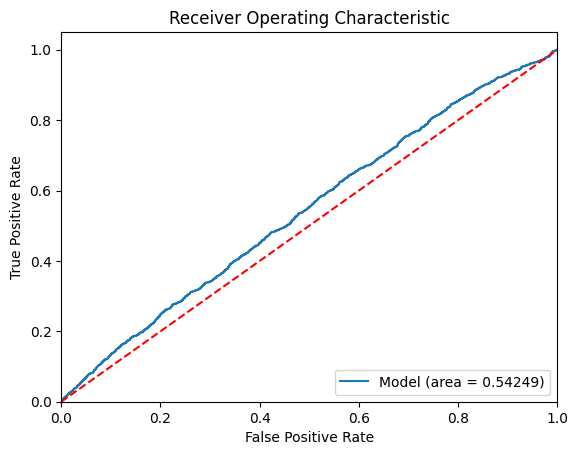

In [89]:
# with PCA-transformed
logs = LogisticRegression()
comp = np.array(list(zip(*components))[0]).reshape(-1,1)
v_comp = np.array(list(zip(*valid_comp))[0]).reshape(-1,1)
evaluate_model(logs, comp, y_train, v_comp, y_valid)

[0.86352784 0.13647216]


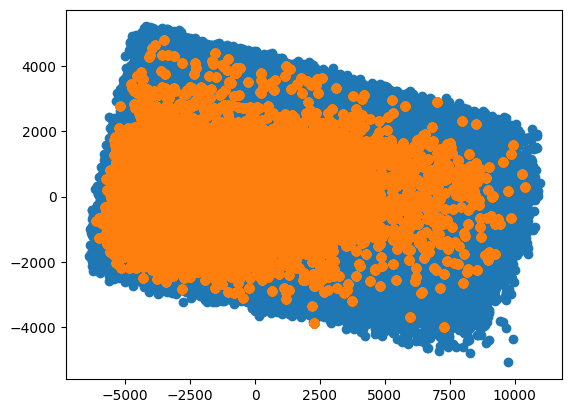

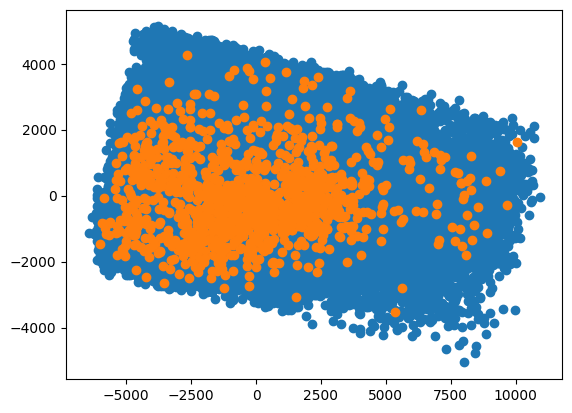

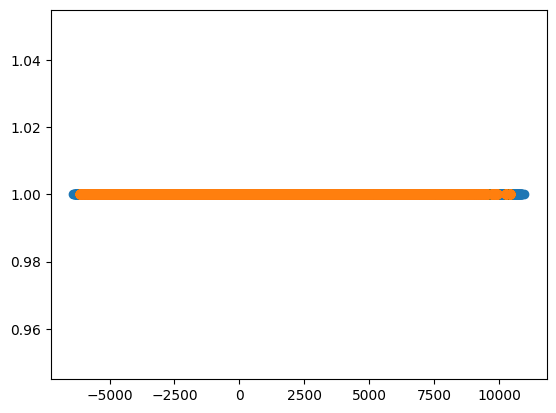

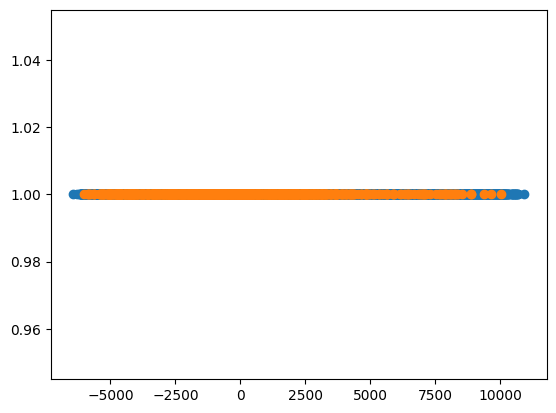

In [90]:
# only using 6h and 24h
pca = PCA(n_components=2)
components = pca.fit_transform(X_train[['velocity_6h', 'velocity_24h']])
print(pca.explained_variance_ratio_)

plt.scatter(components[list(y_train['fraud_bool'] == 0),0], components[list(y_train['fraud_bool'] == 0),1])
plt.scatter(components[list(y_train['fraud_bool'] == 1),0], components[list(y_train['fraud_bool'] == 1),1])
plt.show()

valid_comp = pca.transform(X_valid[['velocity_6h', 'velocity_24h']])
plt.scatter(valid_comp[list(y_valid['fraud_bool'] == 0),0], valid_comp[list(y_valid['fraud_bool'] == 0),1])
plt.scatter(valid_comp[list(y_valid['fraud_bool'] == 1),0], valid_comp[list(y_valid['fraud_bool'] == 1),1])
plt.show()

plt.scatter(components[list(y_train['fraud_bool'] == 0),0], np.ones(len(components[list(y_train['fraud_bool'] == 0),0])))
plt.scatter(components[list(y_train['fraud_bool'] == 1),0], np.ones(len(components[list(y_train['fraud_bool'] == 1),0])))
plt.show()

plt.scatter(valid_comp[list(y_valid['fraud_bool'] == 0),0], np.ones(len(valid_comp[list(y_valid['fraud_bool'] == 0),0])))
plt.scatter(valid_comp[list(y_valid['fraud_bool'] == 1),0], np.ones(len(valid_comp[list(y_valid['fraud_bool'] == 1),0])))
plt.show()

Accuracy on validation set: 0.61685213
True Neg: 73068 	 False Pos: 45005
False Neg: 685 	 True Pos: 491
Precision on validation set: 0.01079216
Recall on validation set: 0.41751701
F1-Score on validation set: 0.02104045


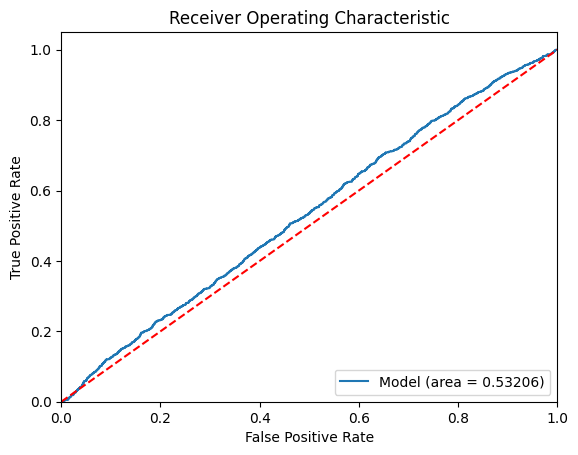

In [91]:
# base model
logs = LogisticRegression()
evaluate_model(logs, X_train[['velocity_6h', 'velocity_24h']], y_train, X_valid[['velocity_6h', 'velocity_24h']], y_valid)

Accuracy on validation set: 0.49455341
True Neg: 58316 	 False Pos: 59757
False Neg: 517 	 True Pos: 659
Precision on validation set: 0.01090771
Recall on validation set: 0.56037415
F1-Score on validation set: 0.02139888


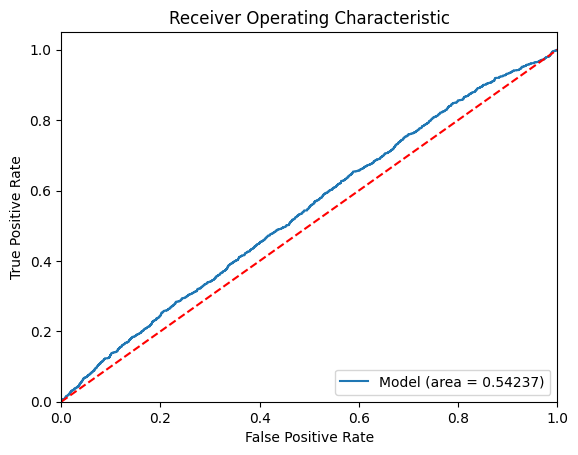

In [92]:
# with PCA-transformed
logs = LogisticRegression()
evaluate_model(logs, components, y_train, valid_comp, y_valid)

Accuracy on validation set: 0.49542554
True Neg: 58421 	 False Pos: 59652
False Neg: 518 	 True Pos: 658
Precision on validation set: 0.01091030
Recall on validation set: 0.55952381
F1-Score on validation set: 0.02140325


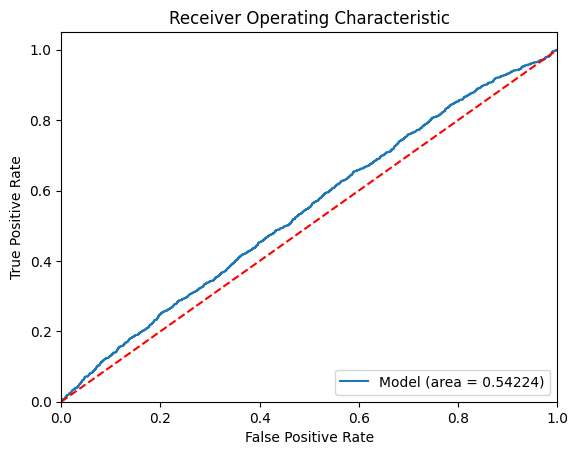

In [93]:
# with PCA-transformed
comp = np.array(list(zip(*components))[0]).reshape(-1,1)
v_comp = np.array(list(zip(*valid_comp))[0]).reshape(-1,1)
logs = LogisticRegression()
evaluate_model(logs, comp, y_train, v_comp, y_valid)

#### LDA

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


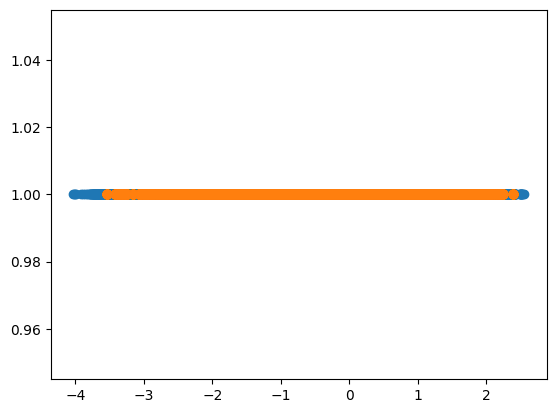

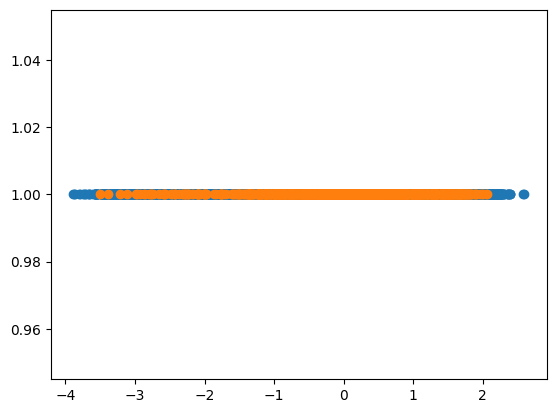

In [97]:
lda = LinearDiscriminantAnalysis()
components = lda.fit_transform(X_train[['velocity_6h', 'velocity_24h', 'velocity_4w']], y_train)

plt.scatter(components[list(y_train['fraud_bool'] == 0),0], np.ones(len(components[list(y_train['fraud_bool'] == 0),0])))
plt.scatter(components[list(y_train['fraud_bool'] == 1),0], np.ones(len(components[list(y_train['fraud_bool'] == 1),0])))
plt.show()

valid_comp = lda.transform(X_valid[['velocity_6h', 'velocity_24h', 'velocity_4w']])
plt.scatter(valid_comp[list(y_valid['fraud_bool'] == 0),0], np.ones(len(valid_comp[list(y_valid['fraud_bool'] == 0),0])))
plt.scatter(valid_comp[list(y_valid['fraud_bool'] == 1),0], np.ones(len(valid_comp[list(y_valid['fraud_bool'] == 1),0])))
plt.show()

Accuracy on validation set: 0.51453681
True Neg: 60725 	 False Pos: 57348
False Neg: 543 	 True Pos: 633
Precision on validation set: 0.01091737
Recall on validation set: 0.53826531
F1-Score on validation set: 0.02140068


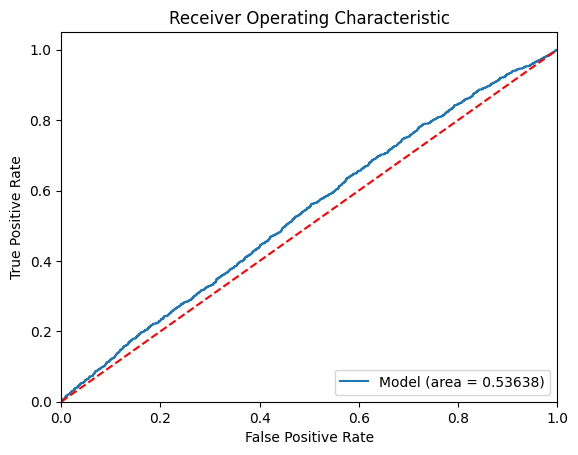

In [98]:
# base model
logs = LogisticRegression()
evaluate_model(logs, X_train[['velocity_6h', 'velocity_24h', 'velocity_4w']], y_train, X_valid[['velocity_6h', 'velocity_24h', 'velocity_4w']], y_valid)

Accuracy on validation set: 0.49962683
True Neg: 58933 	 False Pos: 59140
False Neg: 529 	 True Pos: 647
Precision on validation set: 0.01082175
Recall on validation set: 0.55017007
F1-Score on validation set: 0.02122599


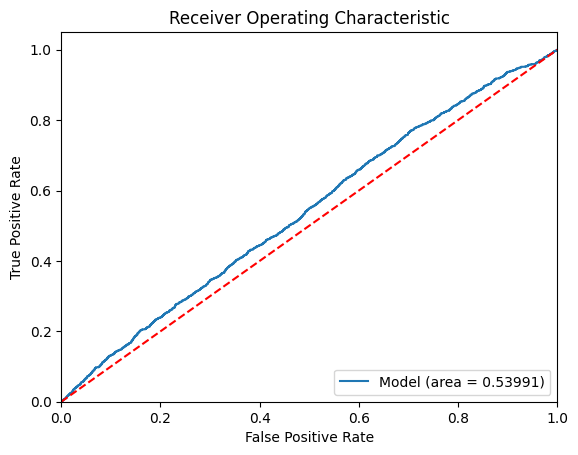

In [99]:
# with LDA-transformed
logs = LogisticRegression()
evaluate_model(logs, components, y_train, valid_comp, y_valid)

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


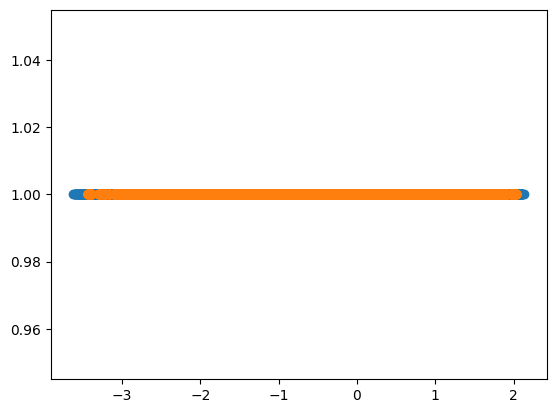

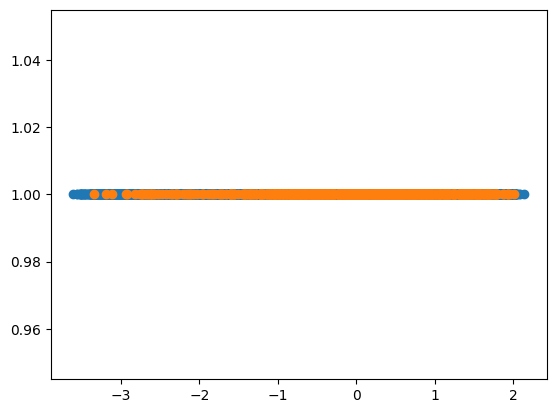

In [103]:
lda = LinearDiscriminantAnalysis()
components = lda.fit_transform(X_train[['velocity_6h', 'velocity_24h']], y_train)

plt.scatter(components[list(y_train['fraud_bool'] == 0),0], np.ones(len(components[list(y_train['fraud_bool'] == 0),0])))
plt.scatter(components[list(y_train['fraud_bool'] == 1),0], np.ones(len(components[list(y_train['fraud_bool'] == 1),0])))
plt.show()

valid_comp = lda.transform(X_valid[['velocity_6h', 'velocity_24h']])
plt.scatter(valid_comp[list(y_valid['fraud_bool'] == 0),0], np.ones(len(valid_comp[list(y_valid['fraud_bool'] == 0),0])))
plt.scatter(valid_comp[list(y_valid['fraud_bool'] == 1),0], np.ones(len(valid_comp[list(y_valid['fraud_bool'] == 1),0])))
plt.show()

Accuracy on validation set: 0.49477144
True Neg: 58343 	 False Pos: 59730
False Neg: 518 	 True Pos: 658
Precision on validation set: 0.01089620
Recall on validation set: 0.55952381
F1-Score on validation set: 0.02137613


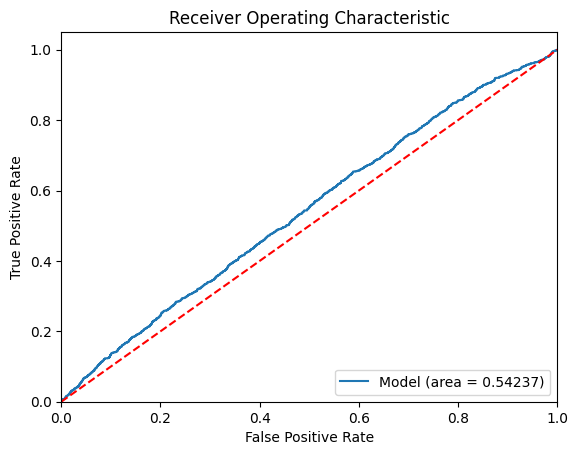

In [104]:
# with LDA-transformed
logs = LogisticRegression()
evaluate_model(logs, components, y_train, valid_comp, y_valid)

### Proposed Credit Limit vs Credit Score

#### PCA

[0.98984925 0.01015075]


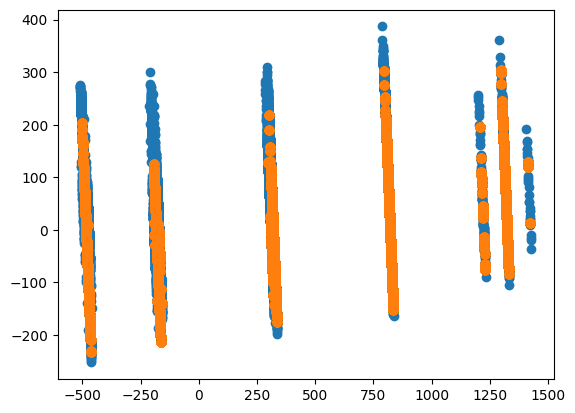

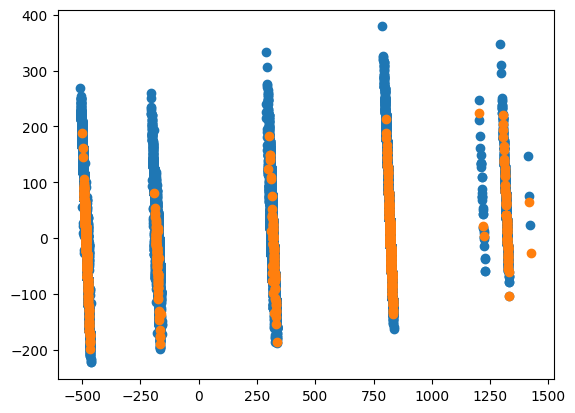

In [105]:
pca = PCA(n_components=2)
components = pca.fit_transform(X_train[['proposed_credit_limit', 'credit_risk_score']])
print(pca.explained_variance_ratio_)

plt.scatter(components[list(y_train['fraud_bool'] == 0),0], components[list(y_train['fraud_bool'] == 0),1])
plt.scatter(components[list(y_train['fraud_bool'] == 1),0], components[list(y_train['fraud_bool'] == 1),1])
plt.show()


valid_comp = pca.transform(X_valid[['proposed_credit_limit', 'credit_risk_score']])
plt.scatter(valid_comp[list(y_valid['fraud_bool'] == 0),0], valid_comp[list(y_valid['fraud_bool'] == 0),1])
plt.scatter(valid_comp[list(y_valid['fraud_bool'] == 1),0], valid_comp[list(y_valid['fraud_bool'] == 1),1])
plt.show()

Accuracy on validation set: 0.69681087
True Neg: 82422 	 False Pos: 35651
False Neg: 504 	 True Pos: 672
Precision on validation set: 0.01850067
Recall on validation set: 0.57142857
F1-Score on validation set: 0.03584096


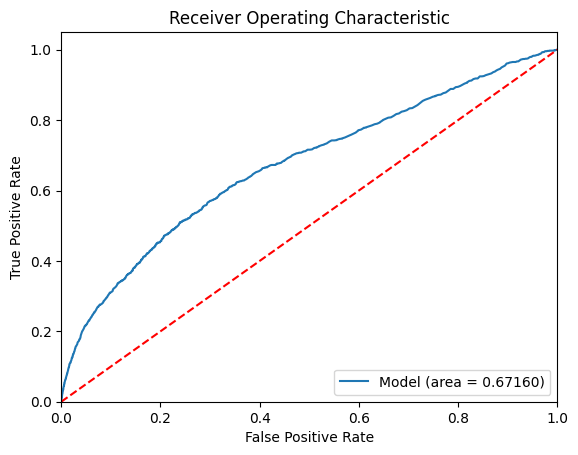

In [106]:
# base model
logs = LogisticRegression()
evaluate_model(logs, X_train[['proposed_credit_limit', 'credit_risk_score']], y_train, X_valid[['proposed_credit_limit', 'credit_risk_score']], y_valid)

Accuracy on validation set: 0.69681087
True Neg: 82422 	 False Pos: 35651
False Neg: 504 	 True Pos: 672
Precision on validation set: 0.01850067
Recall on validation set: 0.57142857
F1-Score on validation set: 0.03584096


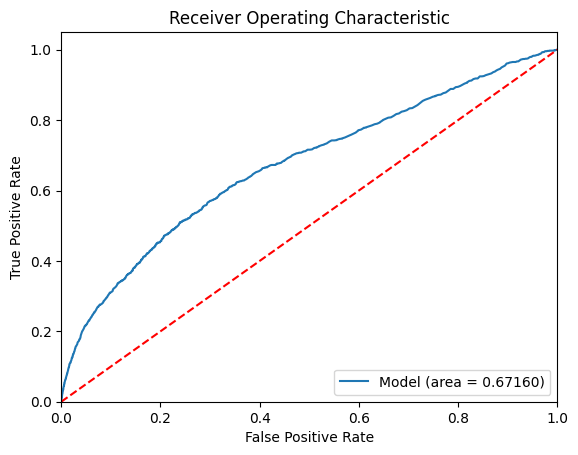

In [107]:
# with PCA-transformed
logs = LogisticRegression()
evaluate_model(logs, components, y_train, valid_comp, y_valid)

Accuracy on validation set: 0.75006918
True Neg: 88877 	 False Pos: 29196
False Neg: 608 	 True Pos: 568
Precision on validation set: 0.01908346
Recall on validation set: 0.48299320
F1-Score on validation set: 0.03671622


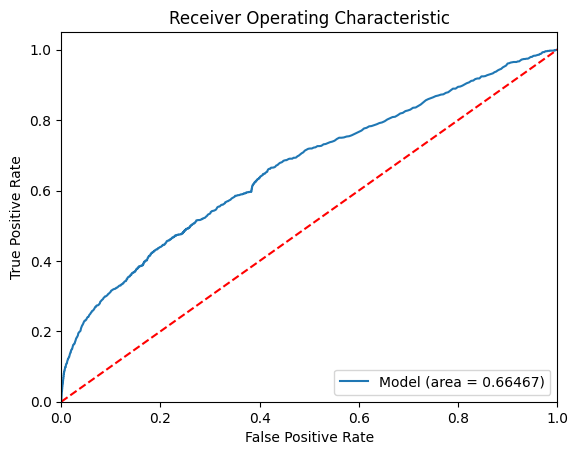

In [108]:
# with PCA-transformed
comp = np.array(list(zip(*components))[0]).reshape(-1,1)
v_comp = np.array(list(zip(*valid_comp))[0]).reshape(-1,1)
logs = LogisticRegression()
evaluate_model(logs, comp, y_train, v_comp, y_valid)

#### LDA

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


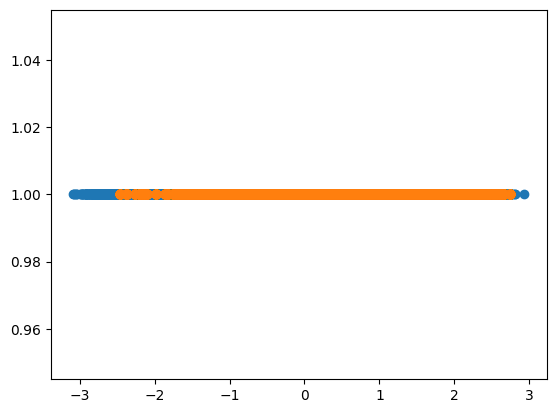

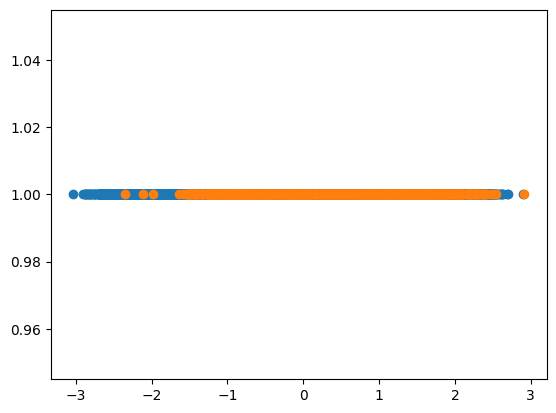

In [109]:
lda = LinearDiscriminantAnalysis()
components = lda.fit_transform(X_train[['proposed_credit_limit', 'credit_risk_score']], y_train)

plt.scatter(components[list(y_train['fraud_bool'] == 0),0], np.ones(len(components[list(y_train['fraud_bool'] == 0),0])))
plt.scatter(components[list(y_train['fraud_bool'] == 1),0], np.ones(len(components[list(y_train['fraud_bool'] == 1),0])))
plt.show()

valid_comp = lda.transform(X_valid[['proposed_credit_limit', 'credit_risk_score']])
plt.scatter(valid_comp[list(y_valid['fraud_bool'] == 0),0], np.ones(len(valid_comp[list(y_valid['fraud_bool'] == 0),0])))
plt.scatter(valid_comp[list(y_valid['fraud_bool'] == 1),0], np.ones(len(valid_comp[list(y_valid['fraud_bool'] == 1),0])))
plt.show()

Accuracy on validation set: 0.69854674
True Neg: 82631 	 False Pos: 35442
False Neg: 506 	 True Pos: 670
Precision on validation set: 0.01855339
Recall on validation set: 0.56972789
F1-Score on validation set: 0.03593649


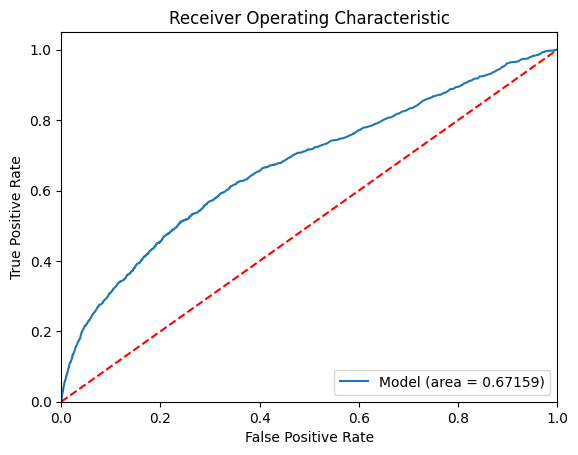

In [110]:
# with PCA-transformed
logs = LogisticRegression()
evaluate_model(logs, components, y_train, valid_comp, y_valid)

ARs:

- velocity6h and velocity4w
- proposed credit limit and credit score to be combined with other variables to do more PCA/dimension reduction